In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from tensorflow.keras.utils import image_dataset_from_directory

In [3]:
train = r'D:\data_science_archivos\enfermedad de planta\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train'
val =  r'D:\data_science_archivos\enfermedad de planta\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid'

In [4]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    
)


Found 70295 files belonging to 38 classes.


In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    val,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    
)

Found 17572 files belonging to 38 classes.


In [6]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [7]:
for x, y in training_set.take(1):
    print(x)
    print(y)
    

tf.Tensor(
[[[[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  ...

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     

In [8]:
from tensorflow.keras.layers import Dense, Conv2D
from tensorflow.keras import layers

In [9]:
model = tf.keras.models.Sequential()

In [10]:
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=1500,activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(units=38,activation='softmax'))



In [12]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 59, 59, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 29, 29, 64)        0         
 g2D)                                                   

In [14]:
training_history = model.fit(x=training_set, validation_data=validation_set, epochs=10)

Epoch 1/10


2197/2197 [==============================] - 1700s 773ms/step - loss: 0.9038 - accuracy: 0.7406 - val_loss: 0.2862 - val_accuracy: 0.9103
Epoch 2/10
2197/2197 [==============================] - 1771s 806ms/step - loss: 0.2486 - accuracy: 0.9208 - val_loss: 0.2088 - val_accuracy: 0.9350
Epoch 3/10
2197/2197 [==============================] - 1781s 811ms/step - loss: 0.1222 - accuracy: 0.9604 - val_loss: 0.1968 - val_accuracy: 0.9416
Epoch 4/10
2197/2197 [==============================] - 1712s 779ms/step - loss: 0.0861 - accuracy: 0.9710 - val_loss: 0.2158 - val_accuracy: 0.9400
Epoch 5/10
2197/2197 [==============================] - 5899s 3s/step - loss: 0.0610 - accuracy: 0.9800 - val_loss: 0.2017 - val_accuracy: 0.9429
Epoch 6/10
2197/2197 [==============================] - 1759s 799ms/step - loss: 0.0519 - accuracy: 0.9832 - val_loss: 0.1884 - val_accuracy: 0.9476
Epoch 7/10
2197/2197 [==============================] - 1665s 758ms/step - loss: 0.0419 - accuracy: 0.9859 

In [15]:
train_loss, train_acc = model.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 [==============================] - 353s 160ms/step - loss: 0.0086 - accuracy: 0.9970
Training accuracy: 0.9969983696937561


In [16]:
#Validation set Accuracy
val_loss, val_acc = model.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 83s 150ms/step - loss: 0.1990 - accuracy: 0.9531
Validation accuracy: 0.9530503153800964


In [17]:
model.save('trained_plant_disease_model.keras')

In [18]:
training_history.history 

{'loss': [0.9037945866584778,
  0.24857088923454285,
  0.1221630722284317,
  0.08607713878154755,
  0.060968708246946335,
  0.051927145570516586,
  0.04190794751048088,
  0.03420257195830345,
  0.03278641775250435,
  0.026431024074554443],
 'accuracy': [0.7406074404716492,
  0.9207767248153687,
  0.9604097008705139,
  0.9710221290588379,
  0.9799985885620117,
  0.983156681060791,
  0.9859307408332825,
  0.9888327717781067,
  0.9891457557678223,
  0.9914645552635193],
 'val_loss': [0.28618744015693665,
  0.208841934800148,
  0.19677452743053436,
  0.2158147096633911,
  0.201685830950737,
  0.18842162191867828,
  0.23794035613536835,
  0.19857734441757202,
  0.18779310584068298,
  0.1989981085062027],
 'val_accuracy': [0.9103118777275085,
  0.9349533319473267,
  0.9415547251701355,
  0.9400182366371155,
  0.9429205656051636,
  0.9475870728492737,
  0.9383109211921692,
  0.9504894018173218,
  0.9525381326675415,
  0.9530503153800964]}

In [19]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [20]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


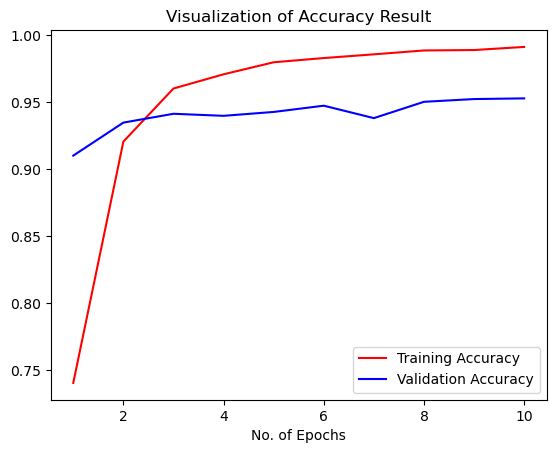

In [21]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()